In [225]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import numpy as np

## Load reviews

In [249]:
col = 'temp_0.8_prompt1'
col_num = col + '_num'
col_rating = col + '_rating'
evaluation_df = pd.read_pickle('data/reviews/poem_reviews_interpreted_v4_krea.pkl')


## Merge checkpoints

In [260]:
col = 'temp_0.8_prompt1'
col_rating = col + '_rating'
files = glob.glob("data/reviews/checkpoints/merge/*.pkl")
files.sort()

evaluation_df = pd.read_pickle(files[0])

for file in files[1:]:
    evaluation_df = pd.concat([evaluation_df,pd.read_pickle(file)])

evaluation_df[col] = evaluation_df[col].apply(lambda x: ' end review \n'.join(x))

evaluation_df.to_csv('data/reviews/reviews_interpreted_creative.csv')
evaluation_df.head()



,Unnamed: 0,LLM,rating:,poem,temp_0.8_prompt1,temp_0.8_prompt1_num,temp_0.8_prompt1_rating,dict
0,0,GPT2-large,13.842811,"berlin Nicht wahr , seit alten Zeiten schon\nJ...",\n\nAussage:\nDas Gedicht ist eine Kritik an d...,"[1, 0, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1...",-2,"[\n{'Kreativität': 0, 'Sprache': 0, 'Emotion':..."
1,1,GPT2-large,26.905119,"Und doch , ihr gutes Recht , man muß sie wähle...",\n\nDieses Gedicht ist leider nicht verständli...,"[-1, 1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, ...",-11,"[\n{'Kreativität': -1, 'Sprache': -1, 'Emotion..."
2,2,GPT2-large,11.222012,"Es rinnet , rinnt das Blut vom weizen\nWir wie...",\n\nDas Gedicht hat eine eindeutige Aussage: E...,"[1, 1, -1, 0, -1, -1, -1, -1, -1, -1, 1, -1, 1...",-6,"[\n{'Kreativität': 0, 'Sprache': 0, 'Emotion':..."
3,3,GPT2-large,211.366778,Ein Nichts ist niemals auch kein Etwas\nEin Ni...,\n\nAussage: Das Gedicht wiederholt sich immer...,"[-1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1...",-14,"[\n{'Kreativität': 0, 'Sprache': 1, 'Emotion':..."
4,4,GPT2-large,18.153678,Denn ihrem Wahn verfallen allzu lose\nWas will...,\n\nAussage: Auf den ersten Blick ist die Auss...,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1...",-13,"[\n{'Kreativität': 0, 'Sprache': 1, 'Emotion':..."


## Prepare the Dataframe

In [261]:
evaluation_df = evaluation_df.rename(columns = {col :'rating', col_num:'rating_list',col_rating: 'rating_sum'})

col = 'rating'
col_rating ='rating_sum'

In [262]:
def str_eval(string):
    string = re.sub('\n','',string)

    return ast.literal_eval(str(string))

evaluation_df['dict'] = evaluation_df['dict'].apply(lambda x: [str_eval(string) for string in x])

In [263]:
keys = ['Verständlichkeit','Kreativität','Sprache','Emotion','gesamt']
keys_sum = [key + '_sum' for key in keys]

for key in keys:
    evaluation_df[key] = evaluation_df['dict'].apply(lambda x: [dic.get(key) if dic.get(key) is not None else 0 for dic in x])

for key in keys:
    for key in keys:
        key_sum = key+'_sum'
        evaluation_df[key_sum] = evaluation_df[key].apply(lambda x: sum(x))

evaluation_df.head()

,Unnamed: 0,LLM,rating:,poem,rating,rating_list,rating_sum,dict,Verständlichkeit,Kreativität,Sprache,Emotion,gesamt,Verständlichkeit_sum,Kreativität_sum,Sprache_sum,Emotion_sum,gesamt_sum
0,0,GPT2-large,13.842811,"berlin Nicht wahr , seit alten Zeiten schon\nJ...",\n\nAussage:\nDas Gedicht ist eine Kritik an d...,"[1, 0, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1...",-2,"[{'Kreativität': 0, 'Sprache': 0, 'Emotion': 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, -1, -1, 1, -1, -1, -1, 0, 0, -1, -1, 0,...","[0, 0, -1, -1, 1, -1, -1, 0, 1, -1, -1, -1, 0,...","[1, 1, -1, -1, 1, 0, 0, 1, 1, -1, 0, 0, 1, 1, 1]","[0, 1, -1, -1, 1, -1, -1, 0, 1, -1, -1, -1, 0,...",0,-5,-3,5,-2
1,1,GPT2-large,26.905119,"Und doch , ihr gutes Recht , man muß sie wähle...",\n\nDieses Gedicht ist leider nicht verständli...,"[-1, 1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, ...",-11,"[{'Kreativität': -1, 'Sprache': -1, 'Emotion':...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-1, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, ...","[-1, 1, -1, -1, 0, -1, -1, 1, 0, 0, -1, 0, 0, ...","[-1, 1, -1, -1, -1, 0, -1, 1, -1, -1, 0, 1, -1...","[-1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 0, ...",0,-12,-3,-5,-9
2,2,GPT2-large,11.222012,"Es rinnet , rinnt das Blut vom weizen\nWir wie...",\n\nDas Gedicht hat eine eindeutige Aussage: E...,"[1, 1, -1, 0, -1, -1, -1, -1, -1, -1, 1, -1, 1...",-6,"[{'Kreativität': 0, 'Sprache': 0, 'Emotion': 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, -1, 1, 0, -1, -1, -1, -1, -1, 1, -1, 1,...","[0, 1, 0, 1, 0, -1, 1, 1, 0, 0, 1, -1, 0, 0, 0]","[1, 1, -1, 1, -1, 0, -1, 0, -1, -1, 1, -1, 1, ...","[0, 1, -1, 1, -1, -1, -1, 0, -1, -1, 1, -1, 1,...",0,-5,3,-2,-5
3,3,GPT2-large,211.366778,Ein Nichts ist niemals auch kein Etwas\nEin Ni...,\n\nAussage: Das Gedicht wiederholt sich immer...,"[-1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1...",-14,"[{'Kreativität': 0, 'Sprache': 1, 'Emotion': 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]","[1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1,...","[1, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, ...",0,-14,2,-10,-11
4,4,GPT2-large,18.153678,Denn ihrem Wahn verfallen allzu lose\nWas will...,\n\nAussage: Auf den ersten Blick ist die Auss...,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1...",-13,"[{'Kreativität': 0, 'Sprache': 1, 'Emotion': -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, -1, -1, -1, -1, -1, -1, 0, 0, -1, 0, -1...","[1, 1, 0, 0, -1, -1, 0, 1, 1, -1, -1, 1, -1, -...","[-1, 1, 0, -1, 0, -1, -1, 0, -1, -1, -1, 0, -1...","[0, 0, -1, -1, -1, -1, -1, 0, 0, -1, -1, 0, -1...",0,-10,-1,-8,-10


In [264]:
col_rating_gpt3 = 'gesamt_sum'

In [292]:
evaluation_df['contradiction'] = evaluation_df.apply(lambda x: ['bert:' + str(x.rating_list[i])+ 'GPT3: ' + str(x.gesamt[i])+' ' + x.rating[i] for i in range(len(x.rating_list)) if x.gesamt[i] == - x.rating_list[i]and x.gesamt[i]!= 0]  ,axis=1)
evaluation_df['abs_difference'] = evaluation_df.apply(lambda x: np.abs(x.rating_sum - x[col_rating_gpt3]),axis=1)

evaluation_df['difference'] = evaluation_df.apply(lambda x: (x.rating_sum - x[col_rating_gpt3]),axis=1)

mean_abs_difference = evaluation_df['abs_difference'].mean()
mean_difference = evaluation_df['difference'].mean()


print(mean_difference)
mean_abs_difference

-1.04625


1.89625

In [256]:
len(evaluation_df)*15

10545

In [257]:
evaluation_df['contradiction_count'] = evaluation_df['contradiction'].apply(lambda x: len(x))
evaluation_df['contradiction_count'].sum()

101

In [258]:
evaluation_df['perplexity'] = evaluation_df['rating:'].apply(lambda x: 1000/x)
evaluation_df.head()

,Unnamed: 0,LLM,rating:,poem,rating,rating_list,rating_sum,dict,Verständlichkeit,Kreativität,...,gesamt,Verständlichkeit_sum,Kreativität_sum,Sprache_sum,Emotion_sum,gesamt_sum,contradiction,abs_difference,contradiction_count,perplexity
99,99,GPT2_top_p,10.038434,"Zur Meise , Freundin Bei der Meise , liebe\nDi...",[\n\nAussage: Der Aussage des Gedichts ist sch...,"[-1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1...",-11,"[{'Verständlichkeit': -1, 'Kreativität': 0, 'S...","[-1, -1, -1, 1, -1, 1, -1, 0, -1, -1, -1, -1, ...","[0, 1, -1, 0, 0, 0, -1, -1, -1, -1, -1, 0, 1, ...",...,"[-1, 0, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1, ...",-9,-4,-5,-5,-10,[],1,0,99.617134
100,100,GPT2-large,21.547134,"Er ists , der Er ists , der mir , der ich Er i...","[\n\nAussage: Der Sprecher des Gedichts will, ...","[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1,...",-11,"[{'Verständlichkeit': -1, 'Kreativität': 0, 'S...","[-1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1,...","[0, 1, -1, -1, -1, 0, -1, 0, 0, -1, 1, -1, -1,...",...,"[-1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1,...",-12,-7,-12,-3,-13,[],2,0,46.409885
101,101,GPT2-large,5.749090,Mancher nennt das vielleicht recht toll\naber ...,[\n\nDieses Gedicht enthält einige Grammatik- ...,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",-15,"[{'Verständlichkeit': -1, 'Kreativität': -1, '...","[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",...,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",-13,-15,-13,-13,-15,[],0,0,173.940582
102,102,GPT2-large,44.951296,Mit welchem Eifer auch die Zeit gelebt\nWir wi...,[\n\nDieses Gedicht hat eine sehr allgemeine A...,"[-1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1,...",-1,"[{'Verständlichkeit': 0, 'Kreativität': 1, 'Sp...","[0, -1, 0, -1, 1, 0, -1, -1, 0, -1, -1, 1, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",...,"[0, -1, 1, -1, 0, 0, -1, -1, 1, 0, -1, 1, 0, 0...",-4,3,-1,2,-2,[],1,0,22.246300
103,103,GPT2-large,77.606716,"Was du erschaust , ist nur ein Spiegel , \nDoc...","[\n\nDieses Gedicht ist eine Aufforderung, sic...","[1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, ...",1,"[{'Verständlichkeit': 1, 'Kreativität': 0, 'Sp...","[1, 1, 1, 1, 0, 1, -1, 1, 1, 1, 0, 0, 1, 1, 1]","[0, 0, 0, -1, -1, 0, -1, 1, 0, 0, -1, -1, 0, 0...",...,"[0, 1, 0, -1, -1, 0, -1, 1, 1, 0, -1, -1, 0, 0...",10,-4,4,5,-1,[bert:-1GPT3: 1 \n\nAussage: Dieses Gedicht ve...,2,2,12.885483


In [266]:
evaluation_df.to_csv('data/reviews/reviews_interpreted_creative_4.csv')

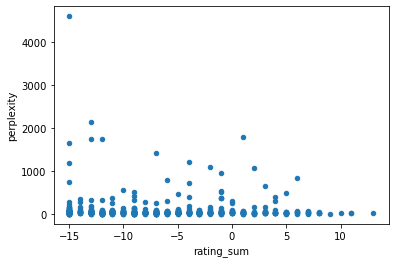

In [191]:
evaluation_df.plot.scatter(x=col_rating,y='perplexity')

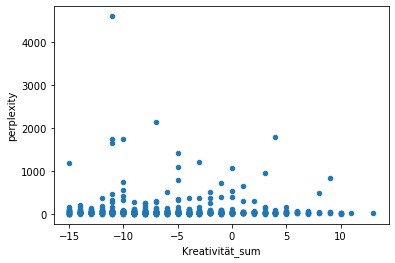

In [192]:
evaluation_df.plot.scatter(x='Kreativität_sum',y='perplexity')

In [271]:
gpt2_df =evaluation_df[evaluation_df.LLM!='GPT3']
len(gpt2_df[gpt2_df[col_rating_gpt3] >= 8])

17

In [278]:
gpt3_df =evaluation_df[evaluation_df.LLM=='GPT3']
len(gpt3_df[gpt3_df[col_rating_gpt3] >= 8])

4

In [281]:
len(gpt2_df[gpt2_df['Kreativität_sum'] >= 8])

13

In [282]:
len(gpt3_df[gpt3_df['Kreativität_sum'] >= 8])

5

In [284]:
len(gpt2_df[gpt2_df['Emotion_sum'] >= 8])

56

In [285]:
len(gpt3_df[gpt3_df['Emotion_sum'] >= 8])

10

In [291]:
len(gpt2_df[gpt2_df['Verständlichkeit_sum'] >= 8])

86

In [290]:
len(gpt3_df[gpt3_df['Verständlichkeit_sum'] >= 8])

44

/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


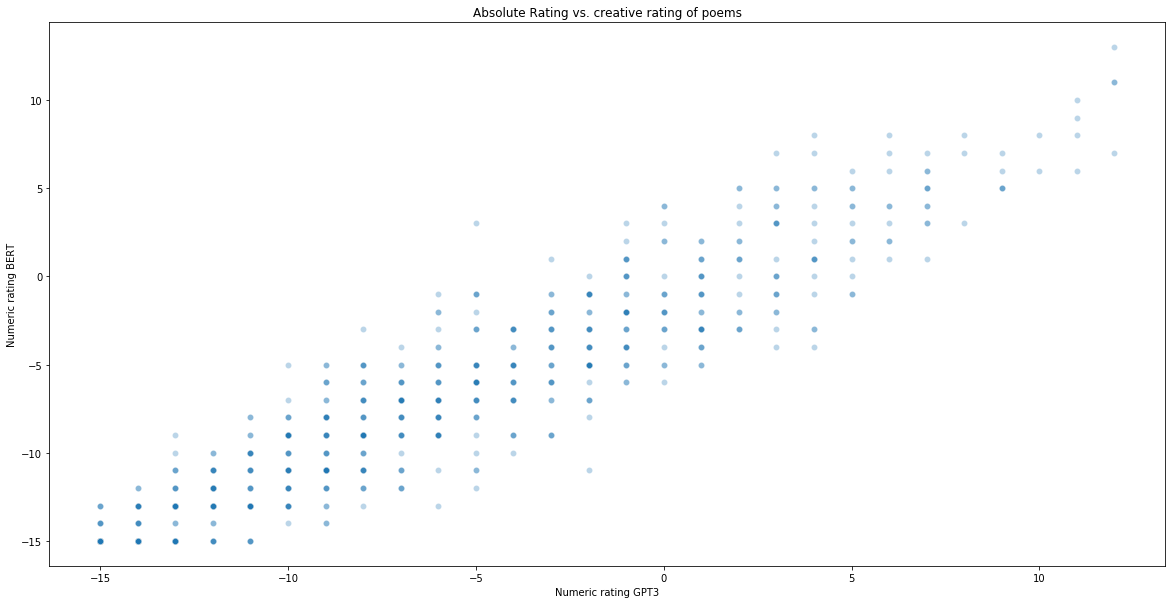

In [198]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(col_rating_gpt3, 'rating_sum', data=evaluation_df, alpha=0.3)

plt.title('Absolute Rating vs. creative rating of poems')
# Set x-axis label
plt.xlabel('Numeric rating GPT3')
# Set y-axis label
plt.ylabel('Numeric rating BERT')

plt.show()

/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

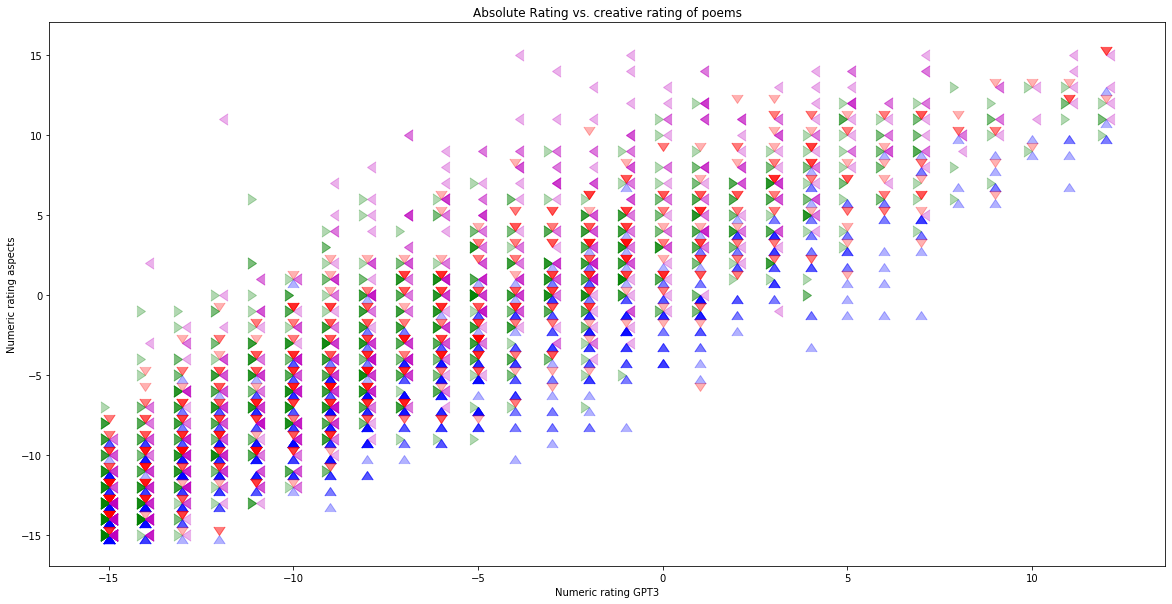

In [199]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(col_rating_gpt3, 'Kreativität_sum', data=evaluation_df, alpha=0.3,color='b',s=130,marker=6)
ax = sns.scatterplot(col_rating_gpt3, 'Emotion_sum', data=evaluation_df, alpha=0.3,color='r',s=130,marker=7)
ax = sns.scatterplot(col_rating_gpt3, 'Sprache_sum', data=evaluation_df, alpha=0.3,color='g',s=130,marker=5)
ax = sns.scatterplot(col_rating_gpt3, 'Verständlichkeit_sum', data=evaluation_df, alpha=0.3,color='m',s=130,marker=4)
plt.title('Absolute Rating vs. creative rating of poems')
# Set x-axis label
plt.xlabel('Numeric rating GPT3')
# Set y-axis label
plt.ylabel('Numeric rating aspects')

plt.show()

/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

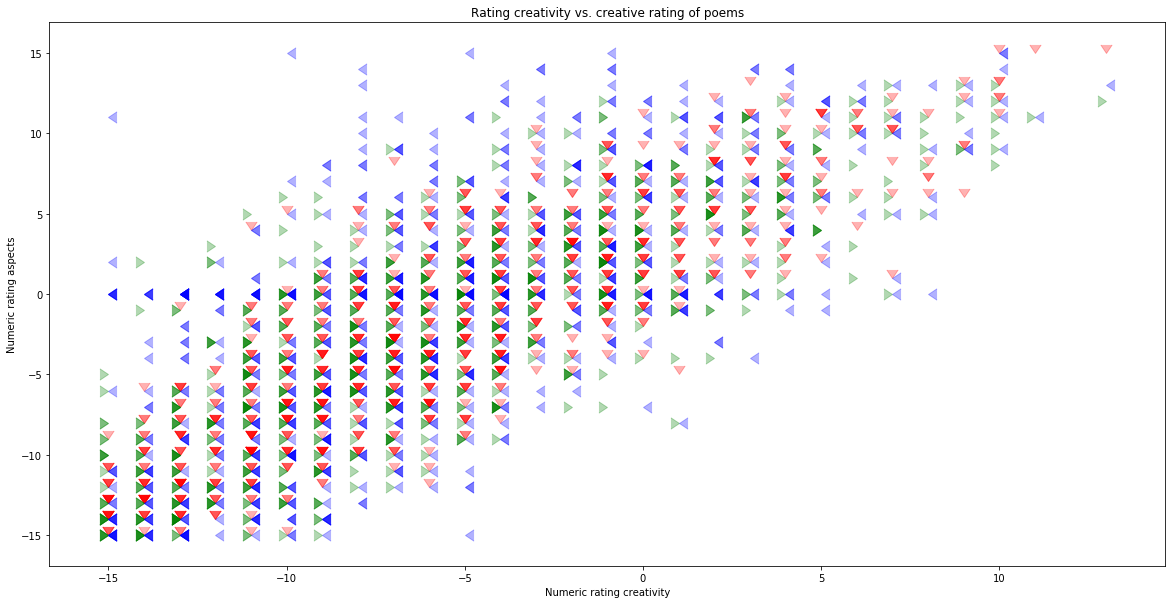

In [301]:
plt.figure(figsize=(20,10))

ax = sns.scatterplot('Kreativität_sum', 'Emotion_sum', data=evaluation_df, alpha=0.3,color='r',s=130,marker=7)
ax = sns.scatterplot('Kreativität_sum', 'Sprache_sum', data=evaluation_df, alpha=0.3,color='g',s=130,marker=5)
ax = sns.scatterplot('Kreativität_sum', 'Verständlichkeit_sum', data=evaluation_df, alpha=0.3,color='b',s=130,marker=4)
plt.title('Rating creativity vs. creative rating of poems')
# Set x-axis label
plt.xlabel('Numeric rating creativity')
# Set y-axis label
plt.ylabel('Numeric rating aspects')

plt.show()

In [302]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

for key in keys_sum:
    x = evaluation_df[100:][key].to_numpy().reshape(-1,1)
    for key_2 in [k for k in keys_sum if k != key]:
        regr = linear_model.LinearRegression()
        y = evaluation_df[100:][key_2].to_numpy().reshape(-1,1)
        regr.fit(x, y)
        print('#### '+key+' vs. '+key_2+'####')
        print('Slope: ',regr.coef_)
        print('Intercept: ',regr.intercept_)
        print("Mean squared error: %.2f" % mean_squared_error(y, regr.predict(x)))
        print('##########################')


#### Verständlichkeit_sum vs. Kreativität_sum####
Slope:  [[0.51729336]]
Intercept:  [-4.83624691]
Mean squared error: 15.92
##########################
#### Verständlichkeit_sum vs. Sprache_sum####
Slope:  [[0.66893281]]
Intercept:  [-1.43268707]
Mean squared error: 15.95
##########################
#### Verständlichkeit_sum vs. Emotion_sum####
Slope:  [[0.64327881]]
Intercept:  [-1.95156614]
Mean squared error: 19.65
##########################
#### Verständlichkeit_sum vs. gesamt_sum####
Slope:  [[0.69739057]]
Intercept:  [-5.21065176]
Mean squared error: 9.90
##########################
#### Kreativität_sum vs. Verständlichkeit_sum####
Slope:  [[1.02429119]]
Intercept:  [4.42448071]
Mean squared error: 31.52
##########################
#### Kreativität_sum vs. Sprache_sum####
Slope:  [[0.92825063]]
Intercept:  [2.84407804]
Mean squared error: 16.78
##########################
#### Kreativität_sum vs. Emotion_sum####
Slope:  [[1.02403175]]
Intercept:  [2.87307488]
Mean squared error: 11.8

/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andreas/.conda/envs/tf36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

Text(0, 0.5, 'Numeric rating aspects')

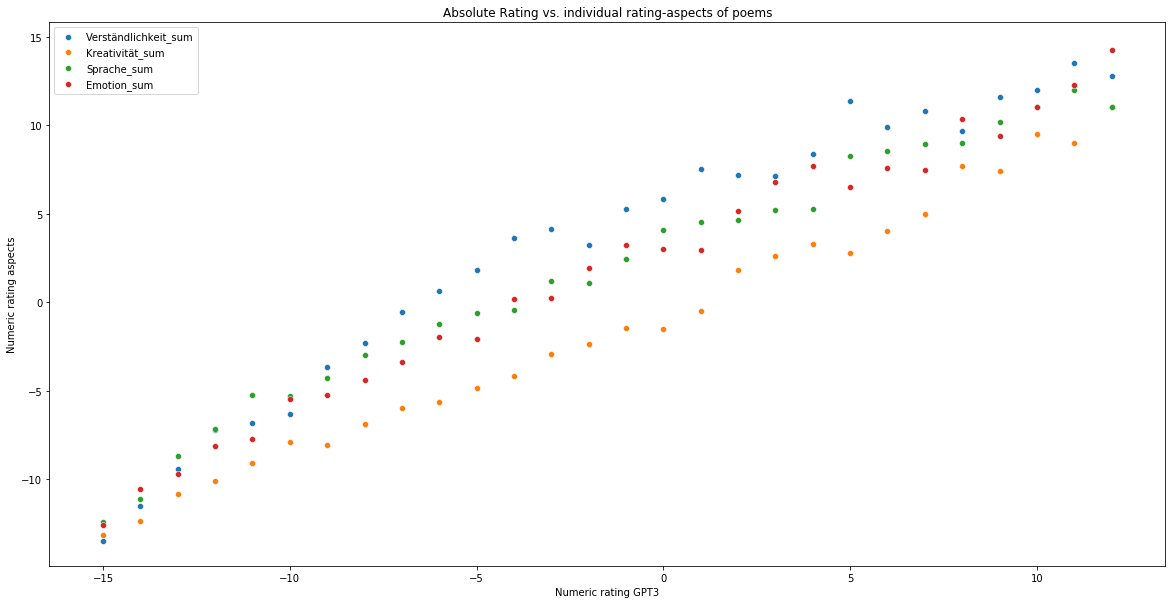

In [259]:
statistic_dict = {}
for key in keys_sum[:-1]:
    mean_lst = []
    for val in range(-15,16):
        val_df = evaluation_df[evaluation_df[col_rating_gpt3] == val]
        mean_lst.append(val_df[key].mean())

    statistic_dict[key] = mean_lst

plt.figure(figsize=(20,10))

for key in statistic_dict.keys():
    ax = sns.scatterplot(list(range(-15,16)),statistic_dict[key],label = key)
plt.title('Absolute Rating vs. individual rating-aspects of poems')
# Set x-axis label
plt.xlabel('Numeric rating GPT3')
# Set y-axis label
plt.ylabel('Numeric rating aspects')



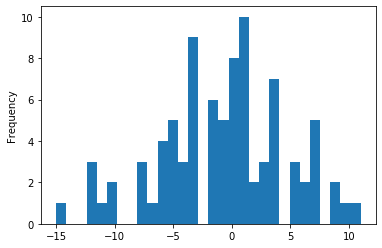

In [267]:
ax = evaluation_df[evaluation_df.LLM=='GPT3']['gesamt_sum'].plot.hist(bins = 30)

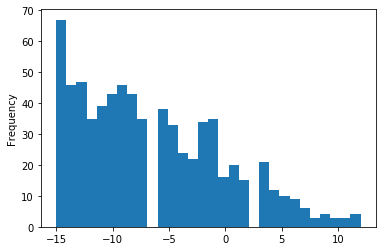

In [268]:
ax = evaluation_df[evaluation_df.LLM!='GPT3']['gesamt_sum'].plot.hist(bins = 30)

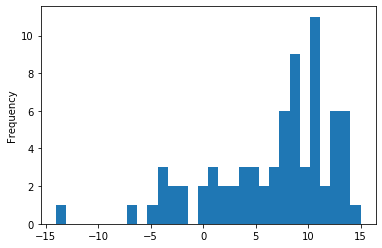

In [208]:
ax = evaluation_df[evaluation_df.LLM=='GPT3']['Verständlichkeit_sum'].plot.hist(bins = 30)

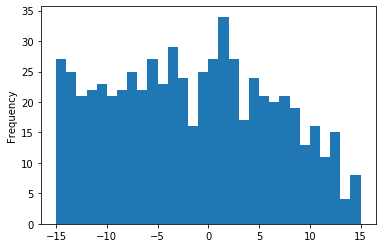

In [209]:
ax = evaluation_df[evaluation_df.LLM!='GPT3']['Verständlichkeit_sum'].plot.hist(bins = 30)

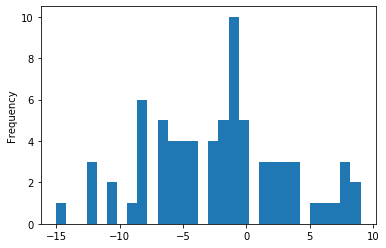

In [216]:
ax = evaluation_df[evaluation_df.LLM=='GPT3']['Kreativität_sum'].plot.hist(bins = 30)

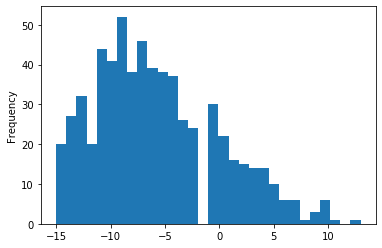

In [215]:
ax = evaluation_df[evaluation_df.LLM!='GPT3']['Kreativität_sum'].plot.hist(bins = 30)

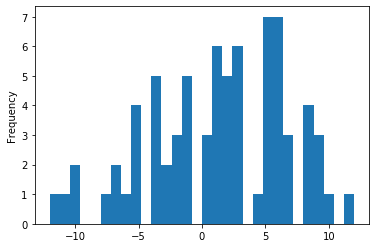

In [223]:
ax = evaluation_df[evaluation_df.LLM=='GPT3']['Emotion_sum'].plot.hist(bins = 30)

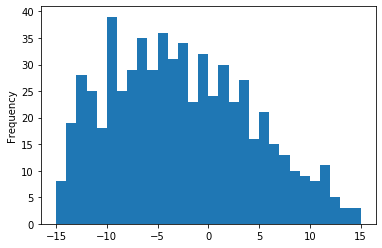

In [224]:
ax = evaluation_df[evaluation_df.LLM!='GPT3']['Emotion_sum'].plot.hist(bins = 30)

In [35]:
gpt2_df =evaluation_df[evaluation_df.LLM!='GPT3']
len(gpt2_df[gpt2_df[col_rating] >= 7])

16

In [36]:
gpt3_df =evaluation_df[evaluation_df.LLM=='GPT3']
len(gpt3_df[gpt3_df[col_rating] >= 7])

4

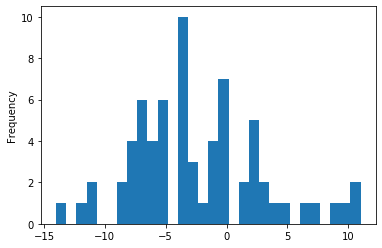

In [20]:
ax = evaluation_df[evaluation_df.LLM=='GPT3']['rating_creative'].plot.hist(bins = 30)

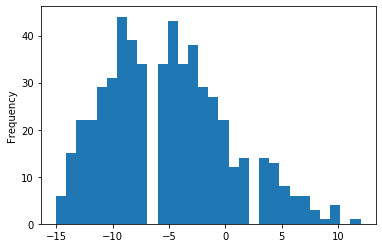

In [21]:
ax = evaluation_df[evaluation_df.LLM!='GPT3']['rating_creative'].plot.hist(bins = 30)

In [32]:
gpt2_df =evaluation_df[evaluation_df.LLM!='GPT3']
len(gpt2_df[gpt2_df['rating_creative'] >= 5])/len(gpt2_df)

0.05263157894736842

In [33]:
gpt3_df =evaluation_df[evaluation_df.LLM=='GPT3']
len(gpt3_df[gpt3_df['rating_creative'] >= 5])/len(gpt3_df)

0.10294117647058823